<a href="https://colab.research.google.com/github/sjw8793/DS2023-HateCrimeAnalysis/blob/main/Hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/SSU2023_1/DataScience/dataset"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SSU2023_1/DataScience/dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Preprocessing - 데이터 합치기
### 인구수 기반으로 정규화한 데이터 & 주별 소득 & 주별 인종 비율

In [3]:
norm_pop_2017 = pd.read_csv('normalized_dataset_2017.csv')
norm_pop_2018 = pd.read_csv('normalized_dataset_2018.csv')
norm_pop_2019 = pd.read_csv('normalized_dataset_2019.csv')
norm_pop_2020 = pd.read_csv('normalized_dataset_2020.csv')
norm_pop_2021 = pd.read_csv('normalized_dataset_2021.csv')

income_2017 = pd.read_csv('income2017.csv')
income_2018 = pd.read_csv('income2018.csv')
income_2019 = pd.read_csv('income2019.csv')
income_2020 = pd.read_csv('income2020.csv')
income_2021 = pd.read_csv('income2021.csv')

df1_2017 = pd.merge(norm_pop_2017, income_2017, on='state_name')
df1_2018 = pd.merge(norm_pop_2018, income_2018, on='state_name')
df1_2019 = pd.merge(norm_pop_2019, income_2019, on='state_name')
df1_2020 = pd.merge(norm_pop_2020, income_2020, on='state_name')
df1_2021 = pd.merge(norm_pop_2021, income_2021, on='state_name')

df1_2017 = df1_2017.drop(['number_of_victims_normalized','number_of_offenders_normalized'], axis=1)
df1_2018 = df1_2018.drop(['number_of_victims_normalized','number_of_offenders_normalized'], axis=1)
df1_2019 = df1_2019.drop(['number_of_victims_normalized','number_of_offenders_normalized'], axis=1)
df1_2020 = df1_2020.drop(['number_of_victims_normalized','number_of_offenders_normalized'], axis=1)
df1_2021 = df1_2021.drop(['number_of_victims_normalized','number_of_offenders_normalized'], axis=1)

norm_race_2017 = pd.read_csv('norm_2017_race.csv')
norm_race_2018 = pd.read_csv('norm_2018_race.csv')
norm_race_2019 = pd.read_csv('norm_2019_race.csv')
norm_race_2020 = pd.read_csv('norm_2020_race.csv')
norm_race_2021 = pd.read_csv('norm_2021_race.csv')

# 각 데이터프레임에서 컬럼 이름 변경
norm_race_2017 = norm_race_2017.rename(columns={'State': 'state_name'})
norm_race_2018 = norm_race_2018.rename(columns={'State': 'state_name'})
norm_race_2019 = norm_race_2019.rename(columns={'State': 'state_name'})
norm_race_2020 = norm_race_2020.rename(columns={'State': 'state_name'})
norm_race_2021 = norm_race_2021.rename(columns={'State': 'state_name'})


df2_2017 = pd.merge(norm_race_2017, income_2017, on='state_name')
df2_2018 = pd.merge(norm_race_2018, income_2018, on='state_name')
df2_2019 = pd.merge(norm_race_2019, income_2019, on='state_name')
df2_2020 = pd.merge(norm_race_2020, income_2020, on='state_name')
df2_2021 = pd.merge(norm_race_2021, income_2021, on='state_name')

data_2017 = pd.merge(df1_2017 , norm_race_2017, on='state_name')
data_2018 = pd.merge(df1_2018, norm_race_2018, on='state_name')
data_2019 = pd.merge(df1_2019, norm_race_2019, on='state_name')
data_2020 = pd.merge(df1_2020, norm_race_2020, on='state_name')
data_2021 = pd.merge(df1_2021, norm_race_2021, on='state_name')


In [4]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   hate_crime_case_normalized  51 non-null     float64
 2   median_income               51 non-null     float64
 3   mean_income                 51 non-null     float64
 4   Black                       51 non-null     float64
 5   Hispanic                    51 non-null     float64
 6   Asian                       51 non-null     float64
 7   Multiple                    51 non-null     float64
 8   Others                      25 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.0+ KB


### 인구수로 정규화하기 전 데이터 로드

In [26]:
df = pd.read_excel('hate_crime_dataset.xlsx')

df2 = df.groupby(['data_year', 'state_name']).agg(hate_crime_case = ('state_name', 'size'))
agg_data = pd.DataFrame(df2).reset_index()
agg_data.columns = ['data_year','state_name', 'hate_crime_case']
agg_data

# 년도별로 데이터 묶기
crime_case_2017 = agg_data[agg_data['data_year'] == 2017]
crime_case_2018 = agg_data[agg_data['data_year'] == 2018]
crime_case_2019 = agg_data[agg_data['data_year'] == 2019]
crime_case_2020 = agg_data[agg_data['data_year'] == 2020]
crime_case_2021 = agg_data[agg_data['data_year'] == 2021]

In [27]:
crime_case_2017 = pd.merge(crime_case_2017 , income_2017, on='state_name')
crime_case_2018 = pd.merge(crime_case_2018, income_2018, on='state_name')
crime_case_2019 = pd.merge(crime_case_2019, income_2019, on='state_name')
crime_case_2020 = pd.merge(crime_case_2020, income_2020, on='state_name')
crime_case_2021 = pd.merge(crime_case_2021, income_2021, on='state_name')

In [28]:
crime_case_2017.head()

,data_year,state_name,hate_crime_case,median_income,mean_income
0,2017,Alabama,14,51197.75,67768.25
1,2017,Alaska,4,79429.25,96527.00
2,2017,Arizona,264,57060.50,76445.00
3,2017,Arkansas,24,47546.75,63906.00
4,2017,California,1094,70413.50,98614.25


### 정규성 검정
#### 정규분포를 따르는지 확인 - 수치적으로
- 샤피로-윌크 검정(shapiro-wilk test)

In [22]:
# 정규화된 데이터
from scipy import stats

datasets = [data_2017, data_2018, data_2019, data_2020, data_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: data_{2017 + i}")

    data = data['hate_crime_case_normalized']

    # Shapiro-Wilk 검정 수행
    statistic, p_value = stats.shapiro(data)

    # p-value와 유의수준(alpha) 비교
    alpha = 0.05
    print('hate_crime_case_normalized에 대한 정규성 검정 결과')
    if p_value > alpha:
      print("데이터는 정규분포를 따릅니다.")
    else:
      print("데이터는 정규분포를 따르지 않습니다.")
print('-------------------------------------------------------')

print('median_income에 대한 정규성 검정 결과')
for i, data in enumerate(datasets):
    print(f"Dataset: data_{2017 + i}")

    data = data['median_income']

    # Shapiro-Wilk 검정 수행
    statistic, p_value = stats.shapiro(data)

    # p-value와 유의수준(alpha) 비교
    alpha = 0.05

    if p_value > alpha:
      print("데이터는 정규분포를 따릅니다.")
    else:
      print("데이터는 정규분포를 따르지 않습니다.")

Dataset: data_2017
hate_crime_case_normalized에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2018
hate_crime_case_normalized에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2019
hate_crime_case_normalized에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2020
hate_crime_case_normalized에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2021
hate_crime_case_normalized에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
-------------------------------------------------------
median_income에 대한 정규성 검정 결과
Dataset: data_2017
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2018
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2019
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2020
데이터는 정규분포를 따르지 않습니다.
Dataset: data_2021
데이터는 정규분포를 따르지 않습니다.


In [23]:
# 정규화전 데이터 -> 결과는 뭐 당연히 동일하겠죠?
from scipy import stats

datasets = [crime_case_2017, crime_case_2018, crime_case_2019, crime_case_2020, crime_case_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: crime_case_{2017 + i}")

    data = data['hate_crime_case']

    # Shapiro-Wilk 검정 수행
    statistic, p_value = stats.shapiro(data)

    # p-value와 유의수준(alpha) 비교
    alpha = 0.05
    print('hate_crime_case에 대한 정규성 검정 결과')
    if p_value > alpha:
      print("데이터는 정규분포를 따릅니다.")
    else:
      print("데이터는 정규분포를 따르지 않습니다.")


Dataset: crime_case_2017
hate_crime_case에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: crime_case_2018
hate_crime_case에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: crime_case_2019
hate_crime_case에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: crime_case_2020
hate_crime_case에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.
Dataset: crime_case_2021
hate_crime_case에 대한 정규성 검정 결과
데이터는 정규분포를 따르지 않습니다.


### 정규성 검정
#### 정규분포를 따르는지 확인 - 시각적으로
- Line-Histogram

## 1. 정규화한 데이터

Dataset: data_2017


<ipython-input-18-331cb203afe7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist = False)


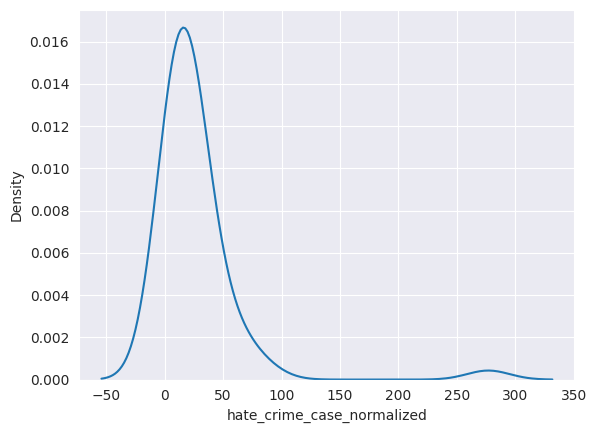

Dataset: data_2018


<ipython-input-18-331cb203afe7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist = False)


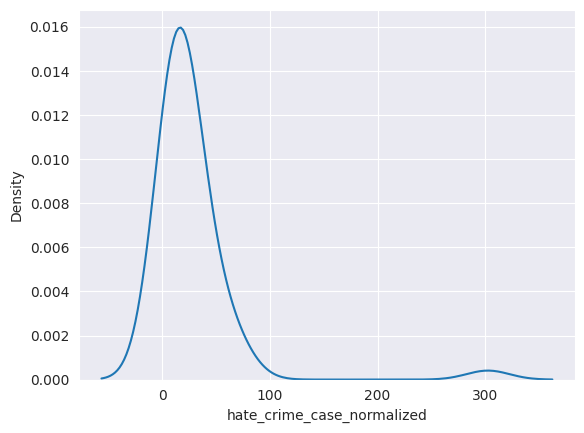

Dataset: data_2019


<ipython-input-18-331cb203afe7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist = False)


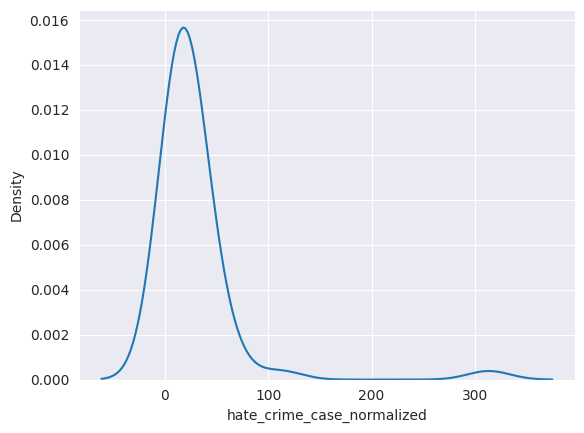

Dataset: data_2020


<ipython-input-18-331cb203afe7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist = False)


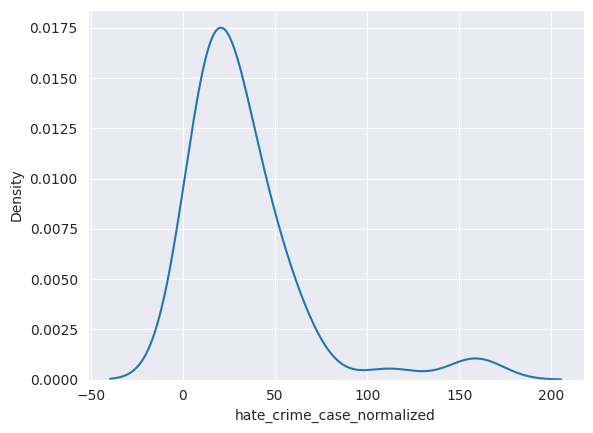

Dataset: data_2021


<ipython-input-18-331cb203afe7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist = False)


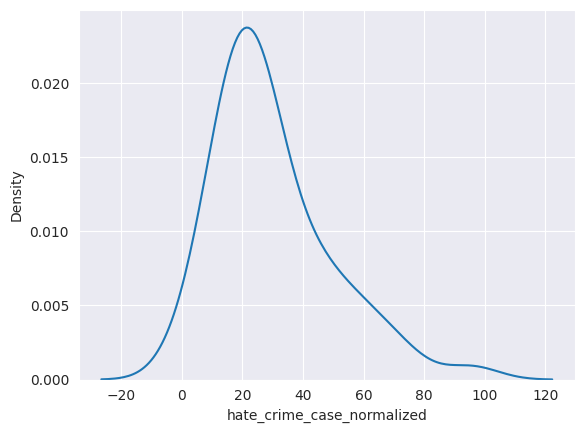

In [18]:
datasets = [data_2017, data_2018, data_2019, data_2020, data_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: data_{2017 + i}")

    sns.set_style('darkgrid')
    sns.distplot(data['hate_crime_case_normalized'], hist = False)

    plt.show()

Dataset: data_2017


<ipython-input-10-426b0a054426>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist=False)
<ipython-input-10-426b0a054426>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


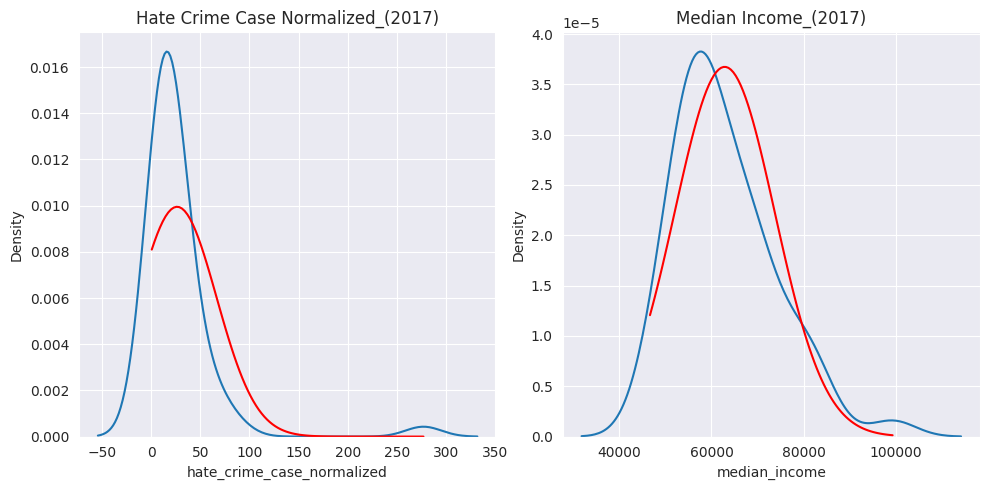

Dataset: data_2018


<ipython-input-10-426b0a054426>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist=False)
<ipython-input-10-426b0a054426>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


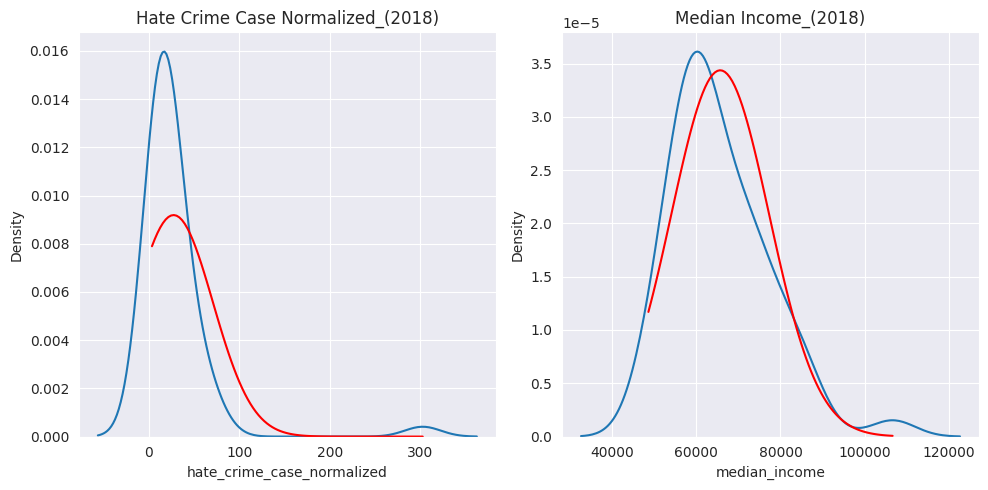

Dataset: data_2019


<ipython-input-10-426b0a054426>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist=False)
<ipython-input-10-426b0a054426>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


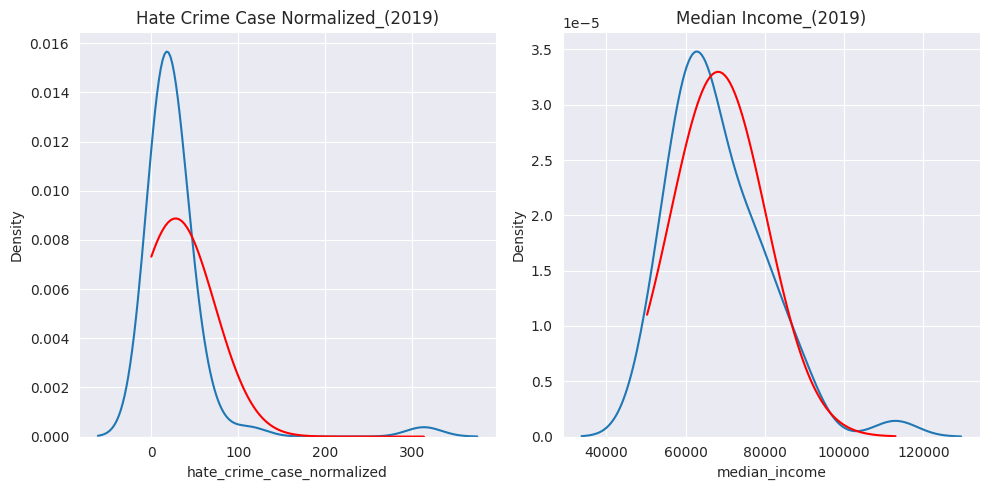

Dataset: data_2020


<ipython-input-10-426b0a054426>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist=False)
<ipython-input-10-426b0a054426>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


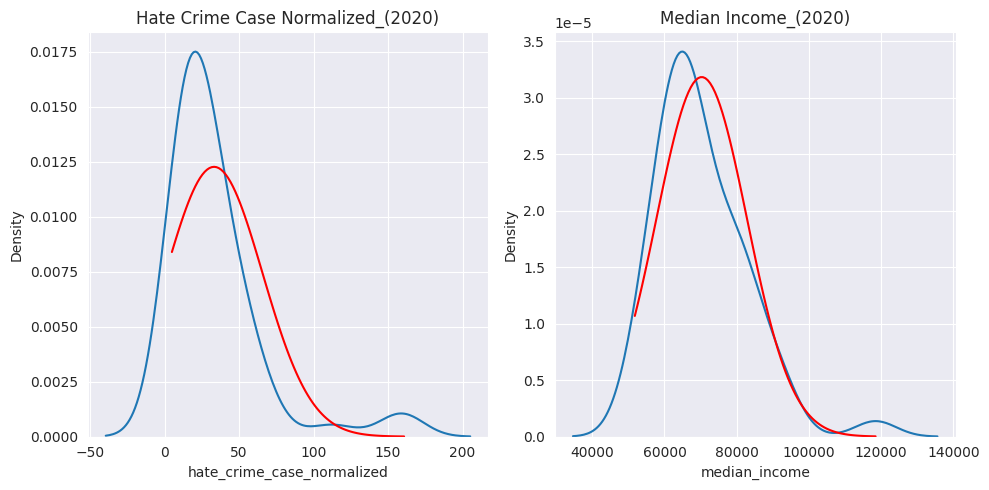

Dataset: data_2021


<ipython-input-10-426b0a054426>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case_normalized'], hist=False)
<ipython-input-10-426b0a054426>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


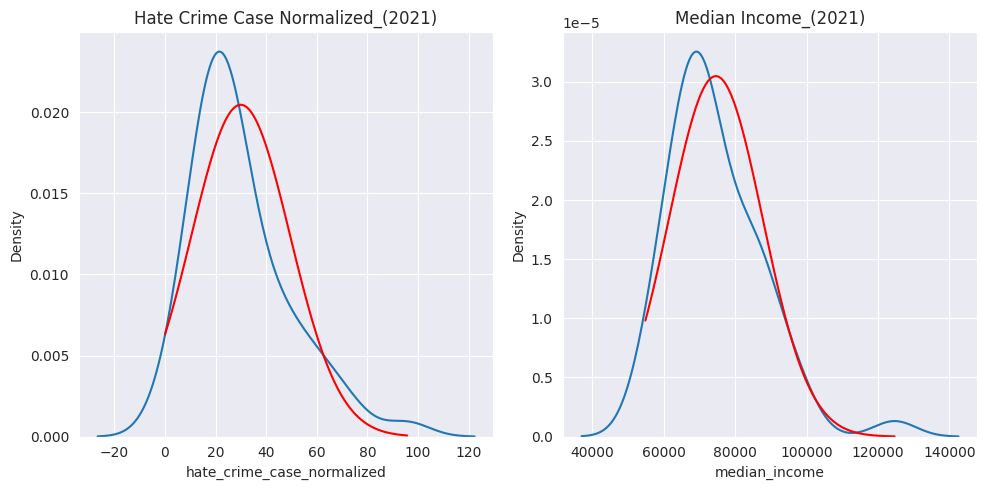

In [ ]:
datasets = [data_2017, data_2018, data_2019, data_2020, data_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: data_{2017 + i}")
    year = 2017 + i

    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 5)) 

    plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
    sns.distplot(data['hate_crime_case_normalized'], hist=False)
    plt.title(f'Hate Crime Case Normalized_({year})')

    # 정규분포 곡선 추가(비교를 위해)
    mean = data['hate_crime_case_normalized'].mean()
    std = data['hate_crime_case_normalized'].std()
    x = np.linspace(data['hate_crime_case_normalized'].min(), data['hate_crime_case_normalized'].max(), 100)
    y = stats.norm.pdf(x, mean, std)
    plt.plot(x, y, color='r')

    plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
    sns.distplot(data['median_income'], hist=False)
    plt.title(f'Median Income_({year})')

    # 정규분포 곡선 추가(비교를 위해)
    mean = data['median_income'].mean()
    std = data['median_income'].std()
    x = np.linspace(data['median_income'].min(), data['median_income'].max(), 100)
    y = stats.norm.pdf(x, mean, std)
    plt.plot(x, y, color='r')

    plt.tight_layout()
    plt.show()


검정에 사용될 속성인 'hate_crime_case_normalized'와 'median_income'모두 정규분포를 따르지 않음

-> 정규분포를 기반으로 하는 가설 검정 방법을 사용X. 

-> 대신, 비모수적인 검정 방법 활용

## 2. 정규화하기 전 데이터

Dataset: crime_case_2017


<ipython-input-19-a9e20ca6c8e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist = False)


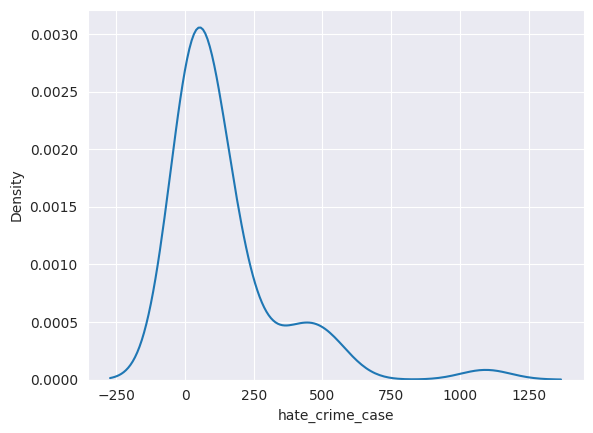

Dataset: crime_case_2018


<ipython-input-19-a9e20ca6c8e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist = False)


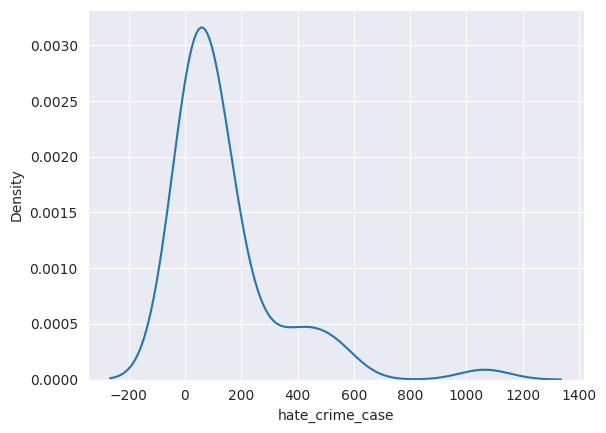

Dataset: crime_case_2019


<ipython-input-19-a9e20ca6c8e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist = False)


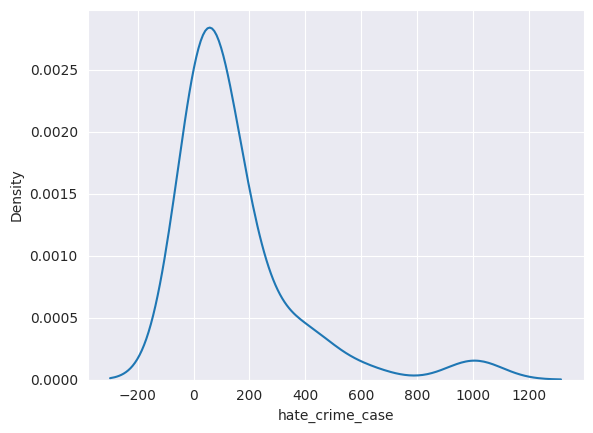

Dataset: crime_case_2020


<ipython-input-19-a9e20ca6c8e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist = False)


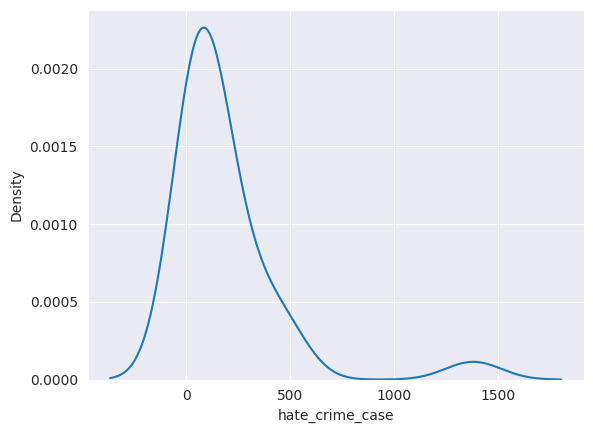

Dataset: crime_case_2021


<ipython-input-19-a9e20ca6c8e2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist = False)


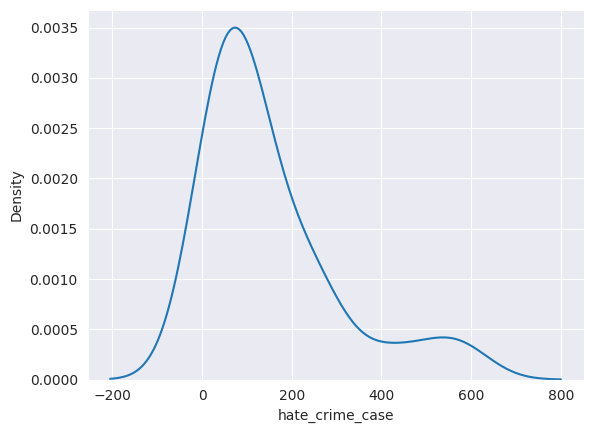

In [19]:
datasets = [crime_case_2017, crime_case_2018, crime_case_2019, crime_case_2020, crime_case_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: crime_case_{2017 + i}")

    sns.set_style('darkgrid')
    sns.distplot(data['hate_crime_case'], hist = False)

    plt.show()

Dataset: crime_case_2017


<ipython-input-29-64d3e776394e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist=False)
<ipython-input-29-64d3e776394e>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


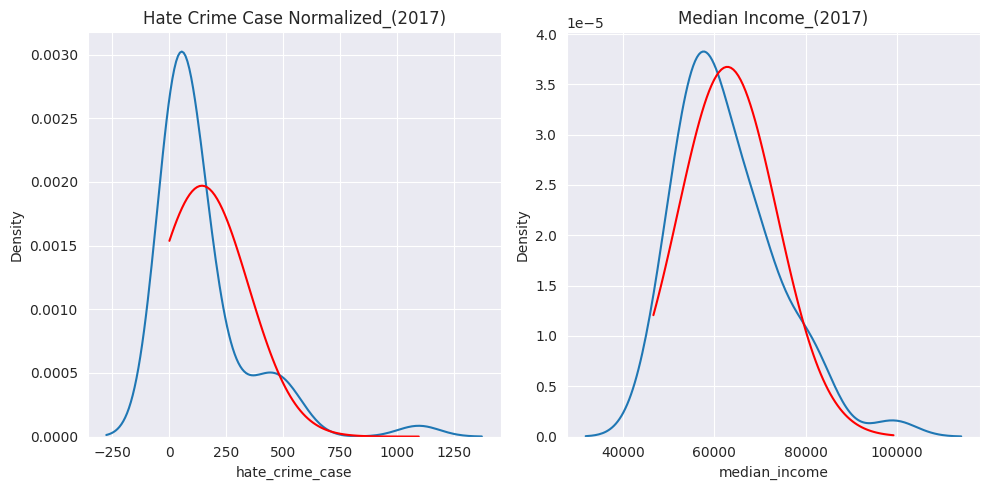

Dataset: crime_case_2018


<ipython-input-29-64d3e776394e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist=False)
<ipython-input-29-64d3e776394e>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


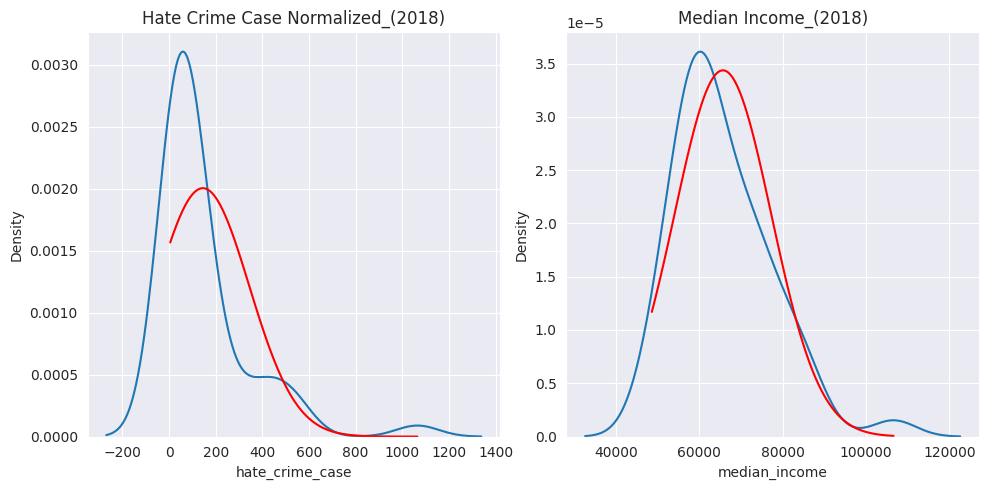

Dataset: crime_case_2019


<ipython-input-29-64d3e776394e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist=False)
<ipython-input-29-64d3e776394e>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


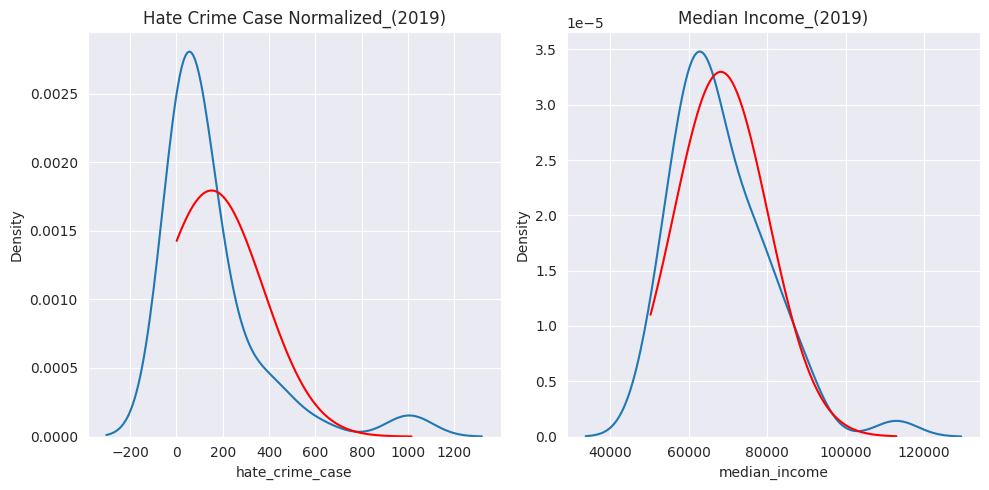

Dataset: crime_case_2020


<ipython-input-29-64d3e776394e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist=False)
<ipython-input-29-64d3e776394e>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


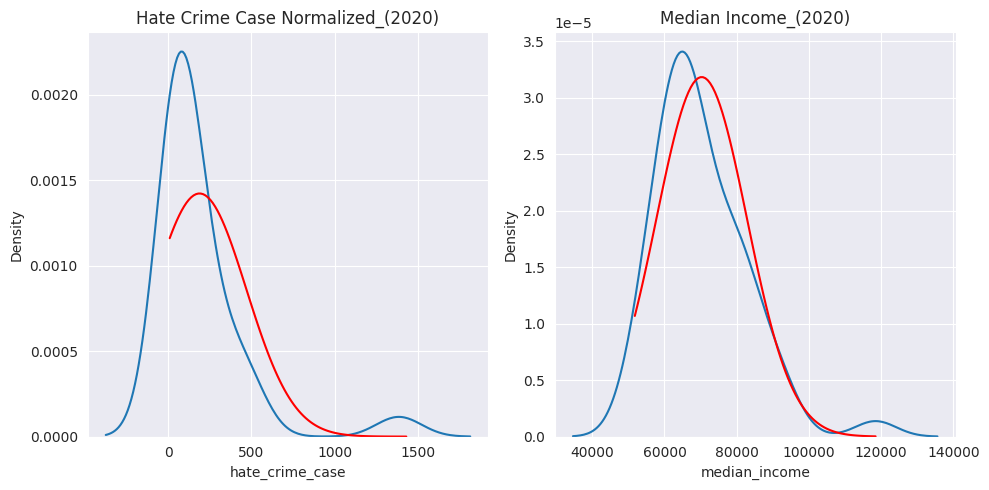

Dataset: crime_case_2021


<ipython-input-29-64d3e776394e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hate_crime_case'], hist=False)
<ipython-input-29-64d3e776394e>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_income'], hist=False)


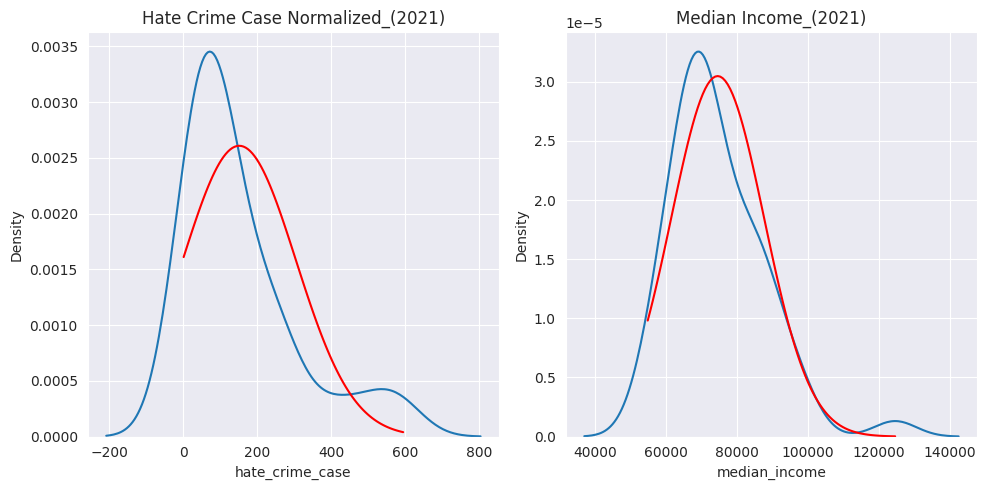

In [29]:
datasets = [crime_case_2017, crime_case_2018, crime_case_2019, crime_case_2020, crime_case_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: crime_case_{2017 + i}")
    year = 2017 + i

    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 5)) 

    plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
    sns.distplot(data['hate_crime_case'], hist=False)
    plt.title(f'Hate Crime Case Normalized_({year})')

    # 정규분포 곡선 추가(비교를 위해)
    mean = data['hate_crime_case'].mean()
    std = data['hate_crime_case'].std()
    x = np.linspace(data['hate_crime_case'].min(), data['hate_crime_case'].max(), 100)
    y = stats.norm.pdf(x, mean, std)
    plt.plot(x, y, color='r')

    plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
    sns.distplot(data['median_income'], hist=False)
    plt.title(f'Median Income_({year})')

    # 정규분포 곡선 추가(비교를 위해)
    mean = data['median_income'].mean()
    std = data['median_income'].std()
    x = np.linspace(data['median_income'].min(), data['median_income'].max(), 100)
    y = stats.norm.pdf(x, mean, std)
    plt.plot(x, y, color='r')

    plt.tight_layout()
    plt.show()


### 상관분석 _ 피어슨 상관계수 사용
#### 주별 소득수준과 범죄횟수 간의 상관관계 파악

피어슨 상관 계수 : 연속형 변수 간의 상관 관계를 평가하는 데 적합 -1 ~ +1

스피어만 상관 계수 :  순위 형태의 변수 또는 비선형 관계를 갖는 변수 간의 상관 관계를 평가하는 데 적합

In [30]:
# 연도별 데이터를 담을 빈 리스트 생성
correlation_results = []

# 연도별로 데이터 분할 및 피어슨 상관 계수 계산
for year in range(2017, 2022):
    # 해당 연도의 데이터프레임 선택
    data = globals()[f"data_{year}"]
    
    # column선택 : state_name, hate_crime_case_normalized, median_income
    selected_data = data[['state_name', 'hate_crime_case_normalized', 'median_income']]
    
    # 피어슨 상관 계수 계산
    pearson_corr = selected_data['hate_crime_case_normalized'].corr(selected_data['median_income'], method='pearson')
    
    # 결과를 딕셔너리로 저장
    correlation_results.append({'Year': year, 'Pearson Correlation Coefficient': pearson_corr})

    # 산점도 출력
    x = data['median_income']
    y = data['hate_crime_case_normalized']

    # #산점도 그리기
    # plt.scatter(x, y)
    # plt.xlabel('Median Income')
    # plt.ylabel('Hate Crime Case Normalized')
    # plt.title('Scatter Plot of Median Income vs. Hate Crime Case Normalized')
    # plt.show()

# 결과 출력
for result in correlation_results:
    print(f"Year: {result['Year']}, Pearson Correlation Coefficient: {result['Pearson Correlation Coefficient']}")

Year: 2017, Pearson Correlation Coefficient: 0.5026505362463362
Year: 2018, Pearson Correlation Coefficient: 0.5460568674434366
Year: 2019, Pearson Correlation Coefficient: 0.6174406329516006
Year: 2020, Pearson Correlation Coefficient: 0.5026584234922596
Year: 2021, Pearson Correlation Coefficient: 0.3288552548021082


### 상관관계 시각화
### 회귀선의 기울기 : 피어슨 상관계수

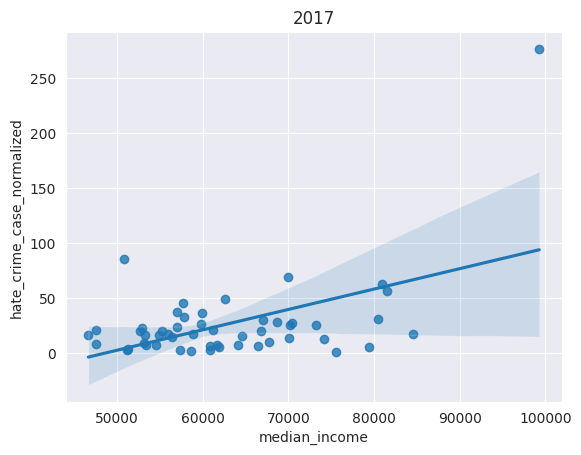

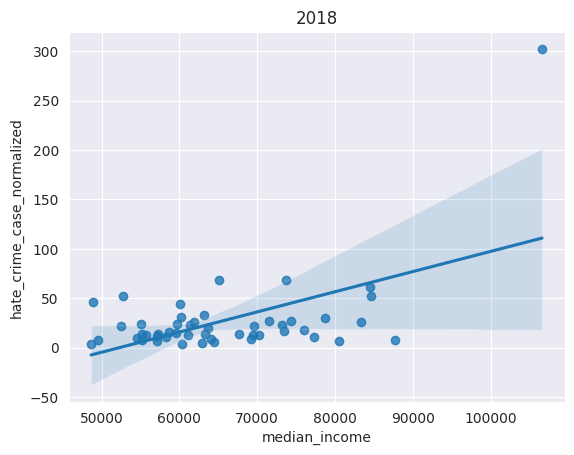

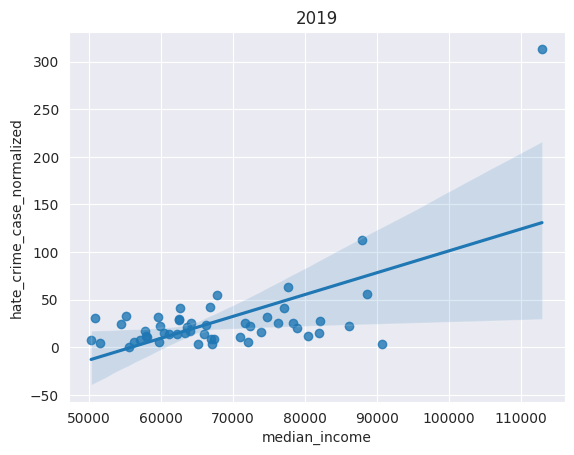

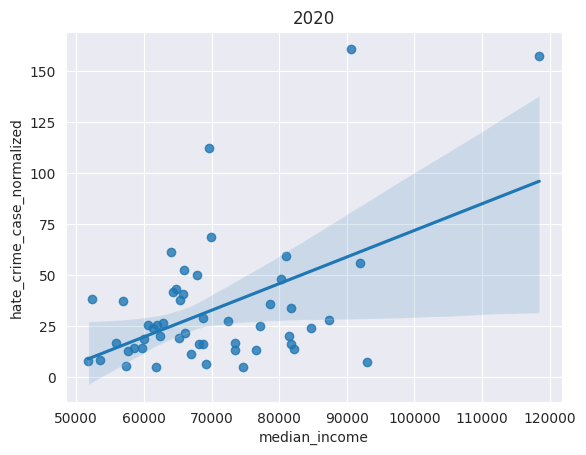

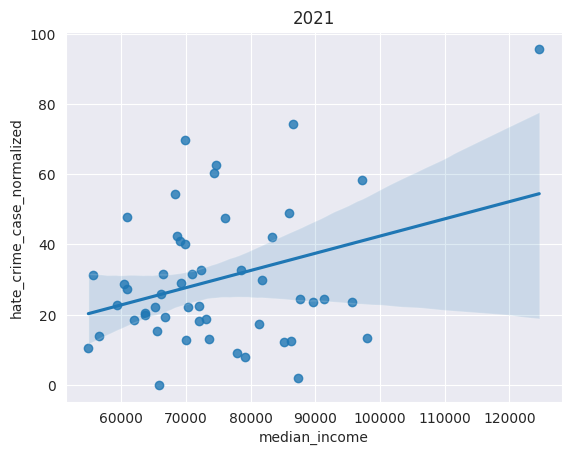

In [31]:
# 연도별로 데이터 분할 및 피어슨 상관 계수 계산
for year in range(2017, 2022):
    # 해당 연도의 데이터프레임 선택
    data = globals()[f"data_{year}"]
    
    # column선택 : state_name, hate_crime_case_normalized, median_income
    selected_data = data[['state_name', 'hate_crime_case_normalized', 'median_income']]
    
    # 피어슨 상관 계수 계산
    pearson_corr = selected_data['hate_crime_case_normalized'].corr(selected_data['median_income'], method='pearson')

    sns.set_style('darkgrid')

    x = data['median_income']
    y = data['hate_crime_case_normalized']
    
    sns.regplot(x=x, y=y,data=data)
    plt.title(f'{year}')

    plt.show()

### 피어슨 상관계수 말고 실제 수치 데이터로 비교

In [35]:
datasets = [crime_case_2017, crime_case_2018, crime_case_2019, crime_case_2020, crime_case_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: crime_case_{2017 + i}")
    print(data.describe())

Dataset: crime_case_2017
       data_year  hate_crime_case  median_income    mean_income
count       51.0        51.000000      51.000000      51.000000
mean      2017.0       143.627451   62868.166667   82525.284314
std          0.0       202.418572   10859.276087   14942.449291
min       2017.0         1.000000   46662.250000   61445.250000
25%       2017.0        25.500000   55029.750000   72518.375000
50%       2017.0        76.000000   60812.250000   77670.500000
75%       2017.0       158.000000   69359.375000   90732.750000
max       2017.0      1094.000000   99281.250000  139831.500000
Dataset: crime_case_2018
       data_year  hate_crime_case  median_income    mean_income
count       49.0        49.000000      49.000000      49.000000
mean      2018.0       144.836735   65696.040816   86423.668367
std          0.0       199.039187   11608.505818   15803.748719
min       2018.0         5.000000   48652.500000   63667.500000
25%       2018.0        30.000000   57223.500000   761

hate_crime_case (모든 년도 다 따졌을 때) 최댓값 : 1428

median_income (모든 년도 다 따졌을 때) 최댓값 : 124628

===> 차이가 너무 커서 동시에 그래프를 그릴 경우 비교 불가능

In [36]:
124528 / 1428

87.20448179271709

Dataset: crime_case_2017


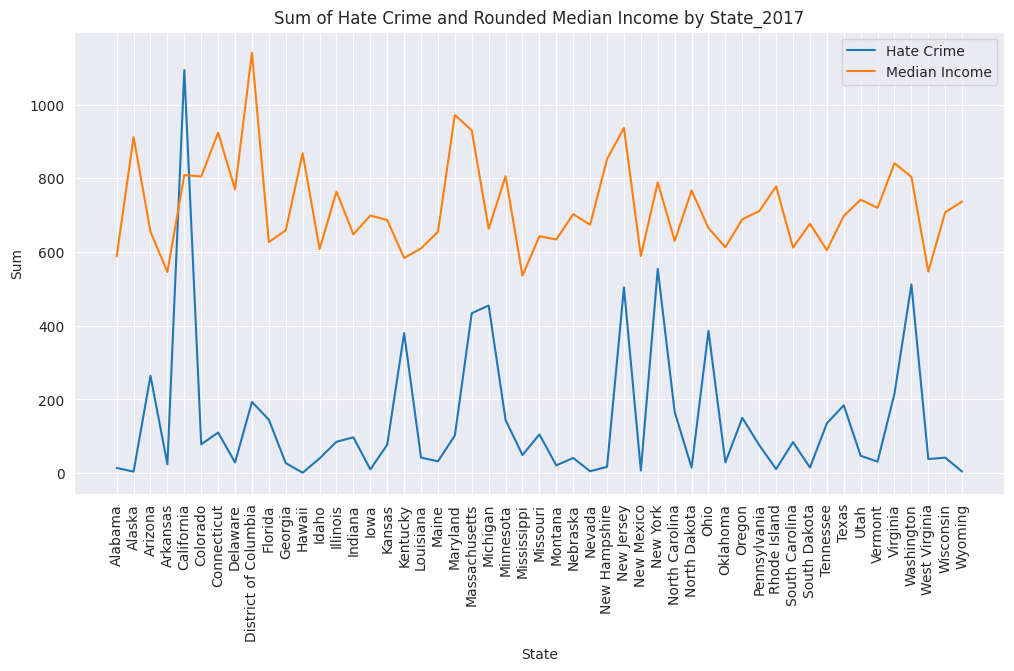

Dataset: crime_case_2018


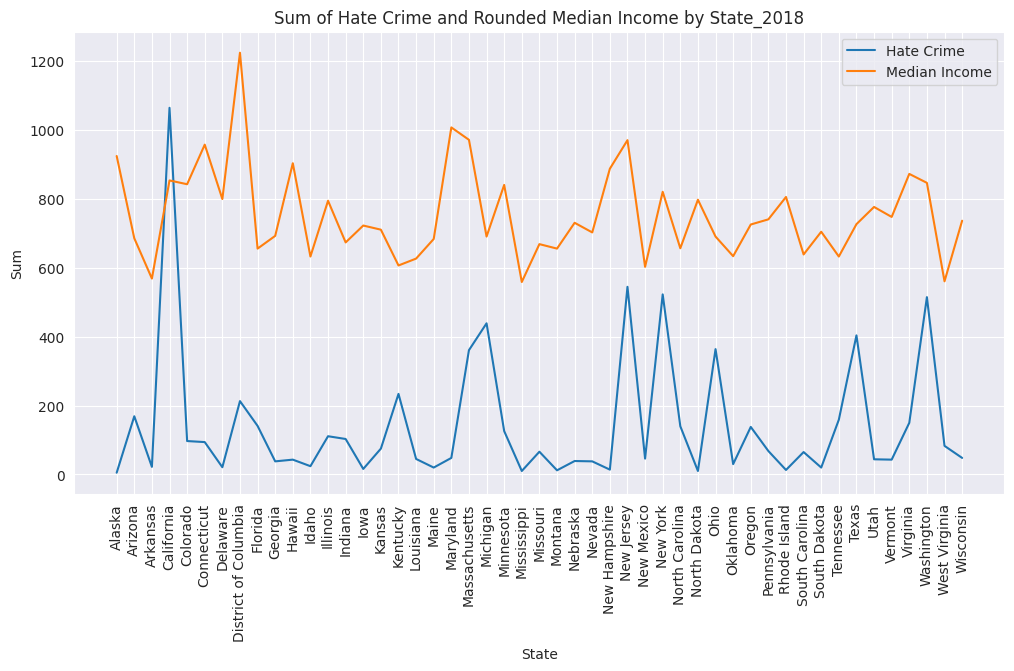

Dataset: crime_case_2019


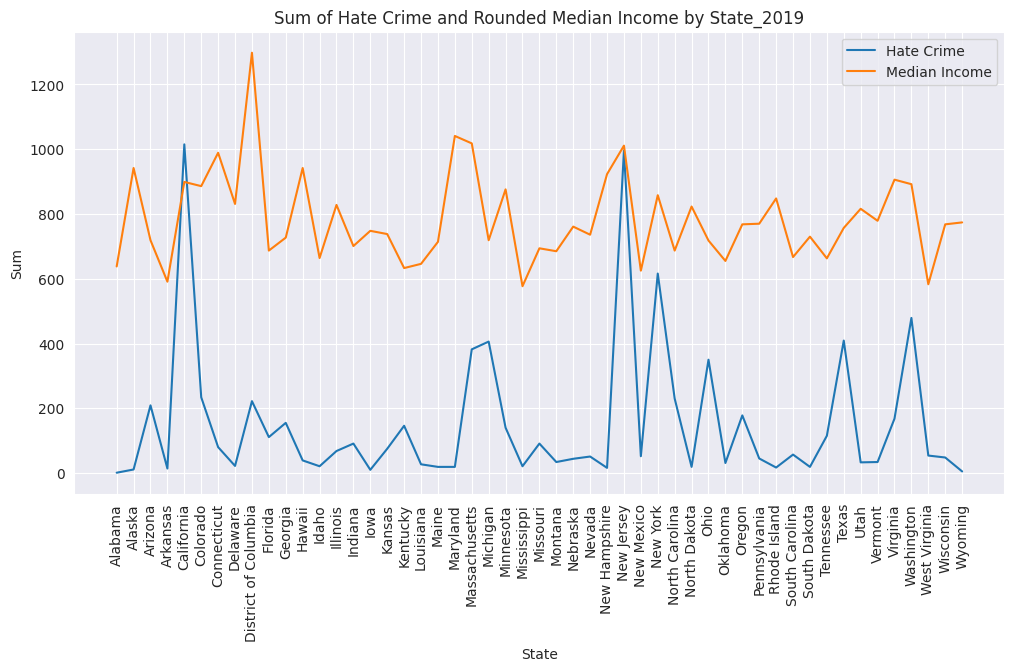

Dataset: crime_case_2020


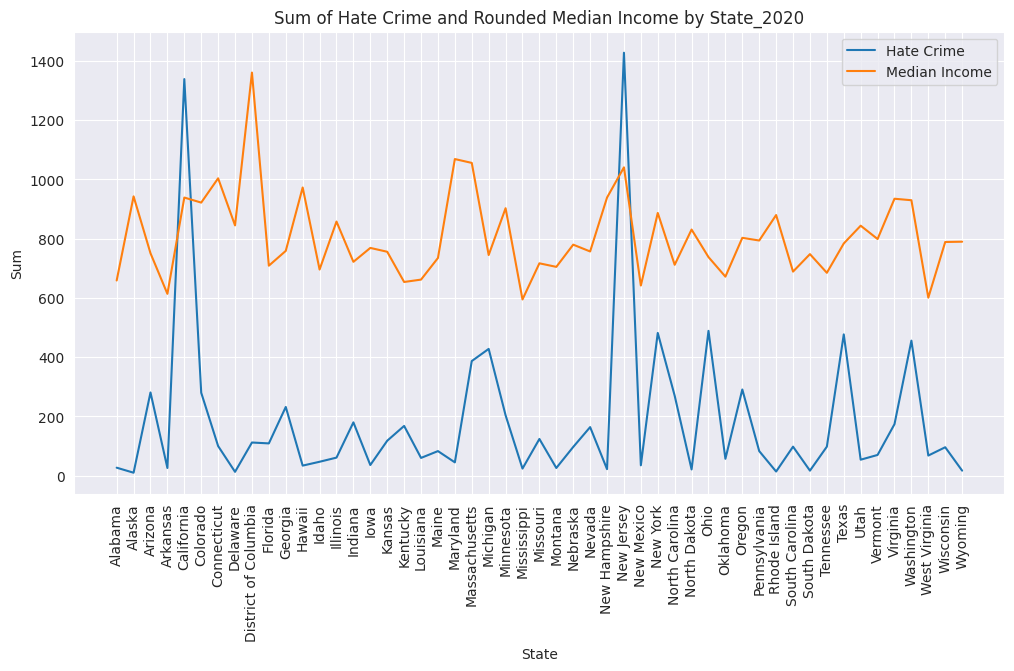

Dataset: crime_case_2021


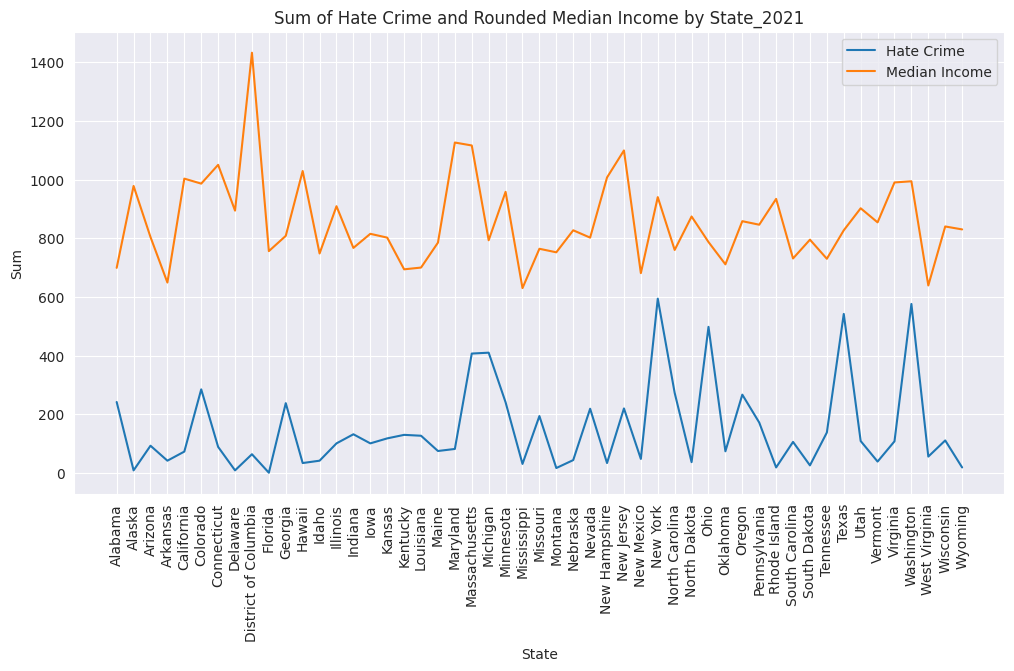

In [39]:
datasets = [crime_case_2017, crime_case_2018, crime_case_2019, crime_case_2020, crime_case_2021]
for i, data in enumerate(datasets):
    print(f"Dataset: crime_case_{2017 + i}")
    year = 2017 + i
    selected_data = data[['state_name', 'hate_crime_case', 'median_income']]

    # 'state_name'의 빈도수 계산
    state_counts = selected_data['state_name'].value_counts().sort_index()
    
    # state_name별 hate_crime_case와 median_income의 합계 계산
    sum_hate_crime = selected_data.groupby('state_name')['hate_crime_case'].sum()
    sum_income = selected_data.groupby('state_name')['median_income'].sum() // 87

    # 그래프 생성
    plt.figure(figsize=(12, 6))
    plt.plot(state_counts.index, sum_hate_crime, label='Hate Crime')
    plt.plot(state_counts.index, sum_income, label='Median Income')
    plt.xlabel('State')
    plt.ylabel('Sum')
    plt.title(f'Sum of Hate Crime and Rounded Median Income by State_{year}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

### 회귀분석 전제조건
- 선형성 -> by. 피어슨상관계수
- 독립성
- 등분산성
- 정규성


#### 2. 독립성 - 다중공선성 판단
VIF(Variance Inflation Factor) 활용.

-> VIF는 각 독립 변수의 설명력에 대한 지표로 값이 1보다 크면 다중공선성의 존재가 의심

In [41]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

datasets = [data_2017, data_2018, data_2019, data_2020, data_2021]

for i, data in enumerate(datasets):
    print(f"Dataset: data_{2017 + i}")

    # Select relevant columns
    selected_data = data[['hate_crime_case_normalized', 'median_income']]

    # Calculate VIF
    vif = pd.DataFrame()
    vif["Variable"] = selected_data.columns
    vif["VIF"] = [variance_inflation_factor(selected_data.values, j) for j in range(selected_data.shape[1])]

    # VIF 출력
    print("VIF:")
    print(vif)
    print()

Dataset: data_2017
VIF:
                     Variable       VIF
0  hate_crime_case_normalized  1.614674
1               median_income  1.614674

Dataset: data_2018
VIF:
                     Variable       VIF
0  hate_crime_case_normalized  1.583809
1               median_income  1.583809

Dataset: data_2019
VIF:
                     Variable       VIF
0  hate_crime_case_normalized  1.612582
1               median_income  1.612582

Dataset: data_2020
VIF:
                     Variable       VIF
0  hate_crime_case_normalized  2.433993
1               median_income  2.433993

Dataset: data_2021
VIF:
                     Variable       VIF
0  hate_crime_case_normalized  3.806578
1               median_income  3.806578



## 분산분석(ANOVA)
### 종속변수가 정규분포를 따르지 않기 때문에 분산분석은 활용X
### -> 비모수적인 분석 방법 사용 : e.g., 크루스칼-월리스 검정,Mann-Whitney U (검정그룹간의 중앙값이 서로 다른지를 비교하는 검정), 회귀 분석, 스피어만 상관 계수 등



---



---



## 1. 가설설정
### "소득 수준과 범죄횟수는 반비례 관계일 것이다."
#### 귀무가설(null_hypothesis) : 소득수준과 범죄횟수는 반비례관계가 아니다.
#### 대립가설(alternative hypothesis) : 소득수준과 범죄횟수는 반비례관계이다.

## 2. 유의수준 설정
#### 0.05로 설정

## 3. 검정통계량 산출

In [32]:
import statsmodels.api as sm

# List of datasets
datasets = [data_2017, data_2018, data_2019, data_2020, data_2021]

# Perform regression analysis for each dataset
for i, data in enumerate(datasets):
    print(f"Dataset: data_{2017 + i}")
    
    # Select relevant columns
    selected_data = data[['state_name', 'hate_crime_case_normalized', 'median_income']]
    
    # Create regression model
    X = selected_data['median_income']
    y = selected_data['hate_crime_case_normalized']
    model = sm.OLS(y, X)
    
    # Fit the regression model
    results = model.fit()
    
    # Print p-value
    print("P-value:", results.pvalues['median_income'])
    print()

Dataset: data_2017
P-value: 1.1096672523609186e-06

Dataset: data_2018
P-value: 2.945023388105651e-06

Dataset: data_2019
P-value: 1.1473230183885673e-06

Dataset: data_2020
P-value: 3.173492237780321e-11

Dataset: data_2021
P-value: 3.9825991046692396e-16



###### 모든 데이터셋의 p-value 값 < 유의수준 0.05
###### 소득수준과 혐오범죄수 간에는 유의미한 상관 관계가 있음을 의미

### 다중 선형 회귀 (Multiple Linear Regression)
#### 소득수준과 인종을 동시에 사용하여 혐오범죄수에 미치는 영향을 분석 
#### 소득수준과 인종을 독립 변수로 혐오범죄수를 종속 변수로 설정하여 수행.

- 결정 계수 (R-squared)는 회귀 분석에서 종속 변수의 변동성을 독립 변수로 설명하는 정도를 나타내는 지표
  - R-squared 값은 0에서 1 사이의 값을 가지며, 높을수록 독립 변수가 종속 변수의 변동성을 잘 설명한다는 것을 의미

#### 우선, 독립변수들 간의 다중공선성(Multicollinearity) 판단
#### 회귀분석의 전제 가정 : 독립변수들 간에 상관관계가 높으면 안됨
#### 일반적으로 5 이상의 값이 나타나면 다중공선성의 증거로 간주

- 다중공선성을 해결할 필요가 있을 경우 : e.g., 변수선택, 변수변환, PCA, 규제모델
  - 변수선택 : 다중공선성이 강하게 나타나는 변수들을 제거하여 모델에 포함시키기
  - 변수변환 : 변수들을 다른 형태로 변환하여 다중공선성 줄이기(e.g., 표준화, 로그변환 등)
  - PCA : 변수들 간의 선형 종속성을 고려하여 변수들을 새로운 주성분으로 변환
  - 규제모델 : 릿지 or 라쏘 등을 활용하여 계수의 크기를 조절
- 변수변환 선택

In [42]:
# # 다중회귀분석 전
# datasets = [data_2017, data_2018, data_2019, data_2020, data_2021]

# # Perform regression analysis for each dataset
# for i, data in enumerate(datasets):
#     print(f"Dataset: data_{2017 + i}")
    
#     # 독립 변수와 종속 변수 설정
#     X = data[['median_income']]
#     y = data['hate_crime_case_normalized']

#     # # 상수 (절편) 추가
#     # X = sm.add_constant(X)
    
#     # 다중 선형 회귀 모델 학습
#     model = sm.OLS(y, X).fit()

#     # 회귀 분석 결과 출력
#     print(model.summary())

In [ ]:
# import scipy.stats as stats

# income_threshold = 50000

# high_income = data_2017[data_2017['median_income'] >= income_threshold]['hate_crime_case_normalized']
# low_income = data_2017[data_2017['median_income'] < income_threshold]['hate_crime_case_normalized']
# result = stats.ttest_ind(high_income, low_income)
# print(f"p-value: {result.pvalue}")


In [ ]:
# # t-test
# # 높은 소득수준 지역과 낮은 소득수준 그룹 간의 범죄횟수 평균 차이 검정
# import scipy.stats as stats

# def perform_t_test(data, income_threshold):
#     high_income = data[data['median_income'] >= income_threshold]['hate_crime_case_normalized']
#     low_income = data[data['median_income'] < income_threshold]['hate_crime_case_normalized']
#     result = stats.ttest_ind(high_income, low_income)
#     return result

# income_threshold = 150000  # 소득수준을 기준으로 높은 소득수준과 낮은 소득수준을 구분하기 위한 임계값 설정

# datasets = [data_2018, data_2019, data_2020, data_2021]

# for year, dataset in enumerate(datasets):
#     print(f"Dataset: data_{2018 + year}")
#     result = perform_t_test(dataset, income_threshold)
#     print(f"p-value: {result.pvalue}")



nan 출력 이유 : 해당 그룹의 데이터 부족 , 분산이 없어서 t-test수행 불가능 

=> 소득 수준을 나누는 기준을 낮춰봤음에도 불구하고 안 나옴

전처리 과정을 다시 할 필요가 있음...-> 근데, how?

## 4. 기각/채택 판단

- 회귀 분석에 대한 결과

Dataset: data_2017
P-value: 1.1096672523609186e-06

Dataset: data_2018
P-value: 2.945023388105651e-06

Dataset: data_2019
P-value: 1.1473230183885673e-06

Dataset: data_2020
P-value: 3.173492237780321e-11

Dataset: data_2021
P-value: 3.9825991046692396e-16

- 피어슨 상관계수에 대한 결과 

Year: 2017, Pearson Correlation Coefficient: 0.5026505362463362

Year: 2018, Pearson Correlation Coefficient: 0.5460568674434366

Year: 2019, Pearson Correlation Coefficient: 0.6174406329516006

Year: 2020, Pearson Correlation Coefficient: 0.5026584234922596

Year: 2021, Pearson Correlation Coefficient: 0.3288552548021082



---



---



- 회귀 분석 결과

모든 데이터셋에서 p-value가 유의수준인 0.05보다 많이 작게 나옴.
이는 소득수준과 범죄 횟수 간에 통계적으로 유의한 관계가 있음을 나타냄.

- 피어슨 상관계수 결과

모든 데이터셋에서 피어슨 상관계수가 양수로 나타남

상관계수 값이 0에 가까울수록 관련성이 약하고, 1에 가까울수록 관련성이 강함.

모든 연도에서 상관계수가 양수이며, 일부 연도에서는 0.5 이상의 상관계수를 보였음.

이는 소득수준과 범죄 횟수 간에 양적인 관련이 있음을 시사함.

따라서, 피어슨 상관계수 결과를 근거로 가설을 기각

- 시각화 자료

state별 hate_crime의 수와 median_income의 그래프 양상이 유사함.
## 결과
결과적으로, 회귀 분석과 피어슨 상관계수 결과를 통해 소득수준과 범죄횟수는 유의미한 관계가 있고 양의 상관관계가 있음을 확인했으며 시각화를 통하여 둘의 그래프 양상이 비슷한 걸을 확인할 수 있었음. 이를 근거로 "소득수준과 범죄횟수는 반비례일 것이다"라는 가설은 채택할 수 없음.



---



---



---



### Q. 주마다 소득수준과 물가정도는 비례한가?

In [ ]:
rpp = pd.read_excel('RPP.xlsx')

rpp_2017 = rpp[['state_name', 2017]]
rpp_2018 = rpp[['state_name', 2018]]
rpp_2019 = rpp[['state_name', 2019]]
rpp_2020 = rpp[['state_name', 2020]]
rpp_2021 = rpp[['state_name', 2021]]

In [ ]:
df_2017 = pd.merge(df1_2017 , rpp_2017, on='state_name')
df_2018 = pd.merge(df1_2018, rpp_2018, on='state_name')
df_2019 = pd.merge(df1_2019, rpp_2019, on='state_name')
df_2020 = pd.merge(df1_2020, rpp_2020, on='state_name')
df_2021 = pd.merge(df1_2021, rpp_2021, on='state_name')

In [ ]:
df_2017.head()

,state_name,hate_crime_case_normalized,median_income,mean_income,2017
0,Alaska,5.398235,79429.25,96527.00,104.947
1,Alabama,2.870035,51197.75,67768.25,89.938
2,Arkansas,7.989733,47546.75,63906.00,88.259
3,Arizona,37.456967,57060.50,76445.00,97.780
4,California,27.810412,70413.50,98614.25,110.882


In [ ]:
for year in range(2017, 2022):
    price_level = globals()[f"df_{year}"][year]
    income_level = globals()[f"df_{year}"]['median_income']

    # 피어슨 상관계수 계산
    correlation, p_value = stats.pearsonr(price_level, income_level)

    # 상관계수와 p-value 출력
    print(f"{year}년 - 피어슨 상관계수:", correlation)
    print(f"{year}년 - p-value:", p_value)

    # p-value와 유의수준(alpha) 비교
    alpha = 0.05

    if p_value < alpha:
        print(f"{year}년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 있습니다.")
    else:
        print(f"{year}년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 없습니다.")

2017년 - 피어슨 상관계수: 0.8034241298103955
2017년 - p-value: 1.2912413269257282e-12
2017년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 있습니다.
2018년 - 피어슨 상관계수: 0.846717126691656
2018년 - p-value: 1.786148089095925e-14
2018년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 있습니다.
2019년 - 피어슨 상관계수: 0.8443569474039261
2019년 - p-value: 7.000265222476176e-15
2019년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 있습니다.
2020년 - 피어슨 상관계수: 0.8439144732295822
2020년 - p-value: 7.464195529781901e-15
2020년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 있습니다.
2021년 - 피어슨 상관계수: 0.8397159369148299
2021년 - p-value: 1.3589621174044751e-14
2021년 - 물가 수준과 수입 수준은 유의미한 상관 관계가 있습니다.




---



---



---



- PCA 사용X
- 회귀분석 - 정규분포가 아니므로 사용X

- 소득수준은 직관적인 방법으로 보여주기(e.g, 피어슨상관계수)
- 수익 격차 등 다른 요인을 더 넣어서 회귀분석을 넣어보자.

- 피어슨 상관계수

- 회귀분석 : 정규화 전 값을 사용해서(범죄횟수) 인종별/원인별로 구분해서 주소득과 함께 X로 넣어서 돌려보자

- 소득격차/평균소득/소득편차 등을 만들어서 얘네들 간의 모델을 


### 인종인구수, 소득격차까지 넣어서 독립관계인지 판단하고 선형회귀 가능한지 봐보기

### 이번주 역할분배

- 세로축 두개로 해서 한 축 관련해서는 소득수준/ 다른 한 축 관련해서는 범죄 횟수
가로축은 주별로
상관관계 시각화해서 보여주는 방법 고안 - 이채린(목요일까지)

==> 최대한 관계가 좀 보일 수 있게(굳이 상관관계가 아니어도 됩니담!)

- 선형회귀 새로 돌리기 위한 데이터 전처리 - 각 주마다 몇 %의 빈곤/상류층이 있는지 등  : 박건원선배(화)

- 전처리한 데이터 독립관계 판단 후 선형회귀 진행 - 신지원 선배

- 주장과 관련된 논문(사회적인 부문 관련 이슈들) _ ex. 코로나 이후 아시아인에 대한  
<!-- timeline에서 시계열 변화 있던 거 -->

- 각자 ppt로 자신들이 뭘 했었는지 추합해서 올리기 